# Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
%matplotlib inline

In [2]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#To display all the columns of Dataframes
pd.pandas.set_option("display.max_columns", None)

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Load Dataset

In [5]:
traindf = pd.read_excel(r"C:\Users\Z5070\Downloads\Data_Train.xlsx", engine = "openpyxl")
traindf.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
traindf.shape

(10683, 11)

In [7]:
testdf = pd.read_excel(r"C:\Users\Z5070\Downloads\Test_set.xlsx", engine = "openpyxl")
testdf.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [8]:
testdf.shape

(2671, 10)

In [9]:
#Other Method to load multiple dataset
#traindf = pd.read_excel(r"C:\Users\Z5070\Downloads\Data_Train.xlsx")
#testdf = pd.read_excel(r"C:\Users\Z5070\Downloads\Test_set.xlsx")

# View Dataset

In [10]:
traindf.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
testdf.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


# Dataset Rows and Columns count

In [12]:
rows, cols = traindf.shape
print(f"There are {rows} rows and {cols} columns in Train dataset.")

There are 10683 rows and 11 columns in Train dataset.


In [13]:
rows, cols = testdf.shape
print(f"There are {rows} rows and {cols} columns in Test dataset.")

There are 2671 rows and 10 columns in Test dataset.


# Merge Two datasets

In [14]:
finaldf = traindf._append(testdf)
finaldf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Two Dataset Rows and Columns count

In [15]:
rows, cols = finaldf.shape
print(f"There are {rows} rows and {cols} columns in Merged dataset.")

There are 13354 rows and 11 columns in Merged dataset.


# Missing Values/ Null Values

In [16]:
finaldf.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

# Duplicate values

In [17]:
duplicate = finaldf.duplicated().sum()
print(f"Total {duplicate} duplicate values are there in this dataset.")

Total 246 duplicate values are there in this dataset.


# Date Split

In [18]:
finaldf["Date_of_Journey"].str.split("/").str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [19]:
finaldf["Date"] = finaldf["Date_of_Journey"].str.split("/").str[0]
finaldf["Month"] = finaldf["Date_of_Journey"].str.split("/").str[1]
finaldf["Year"] = finaldf["Date_of_Journey"].str.split("/").str[2]

# Dataset infomation

In [20]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [21]:
#Change datatype of date, month and year
finaldf["Date"] = finaldf["Date"].astype(int)
finaldf["Month"] = finaldf["Month"].astype(int)
finaldf["Year"] = finaldf["Year"].astype(int)

In [22]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


# Drop duplicate column

In [23]:
finaldf.drop("Date_of_Journey", axis = 1, inplace = True)

# Split Time

In [24]:
finaldf["Arrival_Time"].str.split(" ").str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [25]:
finaldf["Arrival_Time"] = finaldf["Arrival_Time"].apply(lambda x: x.split(" ")[0])

In [26]:
finaldf["Arrival_Hour"] = finaldf["Arrival_Time"].str.split(":").str[0]
finaldf["Arrival_Min"] = finaldf["Arrival_Time"].str.split(":").str[1]

In [27]:
finaldf.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [28]:
finaldf["Arrival_Hour"] = finaldf["Arrival_Hour"].astype(int)
finaldf["Arrival_Min"] = finaldf["Arrival_Min"].astype(int)

In [29]:
finaldf.drop("Arrival_Time", axis = 1, inplace = True)

In [30]:
finaldf.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [31]:
#Find Unique values

finaldf["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [32]:
finaldf["Total_Stops"] = finaldf["Total_Stops"].map({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4, "nan": 1})

In [33]:
finaldf[finaldf["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480.0,6,5,2019,9,25


In [34]:
finaldf["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Import sklearn library

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [36]:
finaldf["Duration_Hr"] = finaldf["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [37]:
finaldf[finaldf["Duration_Hr"] == "5m"]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hr
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,5m,2.0,No info,17327.0,6,3,2019,16,55,5m
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,5m,2.0,No info,NaN,12,3,2019,16,55,5m


In [38]:
finaldf.drop(6474, axis = 0, inplace = True)
finaldf.drop(2660, axis = 0, inplace = True)

In [39]:
finaldf.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,7


In [40]:
finaldf["Duration_Hr"] = finaldf["Duration_Hr"].astype("int")

In [41]:
finaldf.drop("Duration", axis = 1, inplace = True)

In [42]:
finaldf.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,0.0,No info,3897.0,24,3,2019,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2.0,No info,7662.0,1,5,2019,13,15,7


In [43]:
finaldf["Airline"] = labelencoder.fit_transform(finaldf["Airline"])
finaldf["Source"] = labelencoder.fit_transform(finaldf["Source"])
finaldf["Destination"] = labelencoder.fit_transform(finaldf["Destination"])
finaldf["Additional_Info"] = labelencoder.fit_transform(finaldf["Additional_Info"])

In [44]:
rows, cols =  finaldf.shape
print(f"There are {rows} rows and {cols} columns in this dataset.")

There are 13351 rows and 14 columns in this dataset.


In [45]:
finaldf.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Duration_Hr
0,3,0,5,BLR → DEL,22:20,0.0,8,3897.0,24,3,2019,1,10,2
1,1,3,0,CCU → IXR → BBI → BLR,05:50,2.0,8,7662.0,1,5,2019,13,15,7


In [47]:
finaldf["Price"] = finaldf["Price"].fillna(finaldf["Price"].mean())

In [48]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Route            13350 non-null  object 
 4   Dep_Time         13351 non-null  object 
 5   Total_Stops      13350 non-null  float64
 6   Additional_Info  13351 non-null  int32  
 7   Price            13351 non-null  float64
 8   Date             13351 non-null  int32  
 9   Month            13351 non-null  int32  
 10  Year             13351 non-null  int32  
 11  Arrival_Hour     13351 non-null  int32  
 12  Arrival_Min      13351 non-null  int32  
 13  Duration_Hr      13351 non-null  int32  
dtypes: float64(2), int32(10), object(2)
memory usage: 1.0+ MB


In [49]:
finaldf.drop("Route", axis = 1, inplace = True)

In [50]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Dep_Time         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  int32  
 6   Price            13351 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_Hour     13351 non-null  int32  
 11  Arrival_Min      13351 non-null  int32  
 12  Duration_Hr      13351 non-null  int32  
dtypes: float64(2), int32(10), object(1)
memory usage: 938.7+ KB


# Data Visualization

# Chart 1 - Box Plot (Price of Source)

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

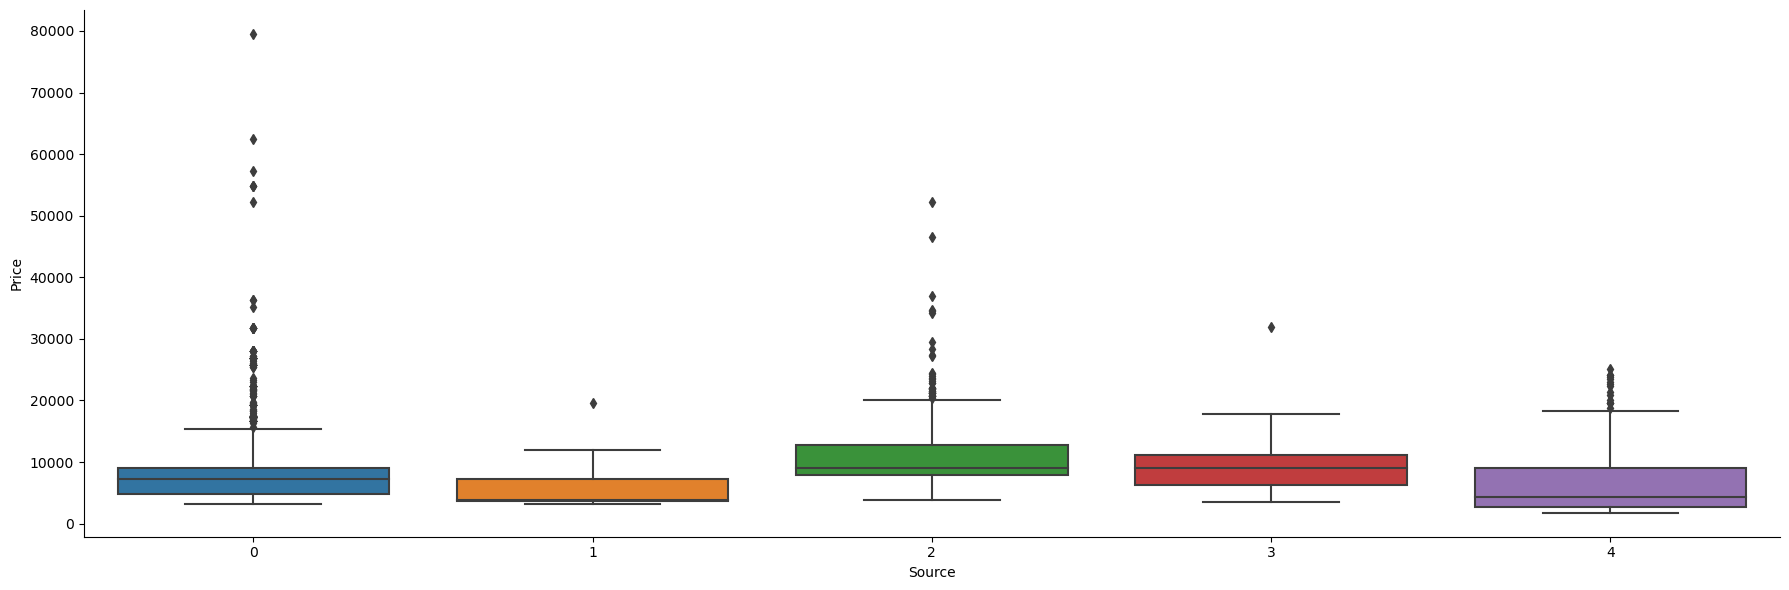

In [51]:
plt.figure(figsize = (12, 8))
sns.catplot(y = "Price", x = "Source", data = finaldf.sort_values("Price", ascending = True), kind = "box", height = 6, aspect = 3)

# Chart 2 - Box plot (Price of Airline)

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

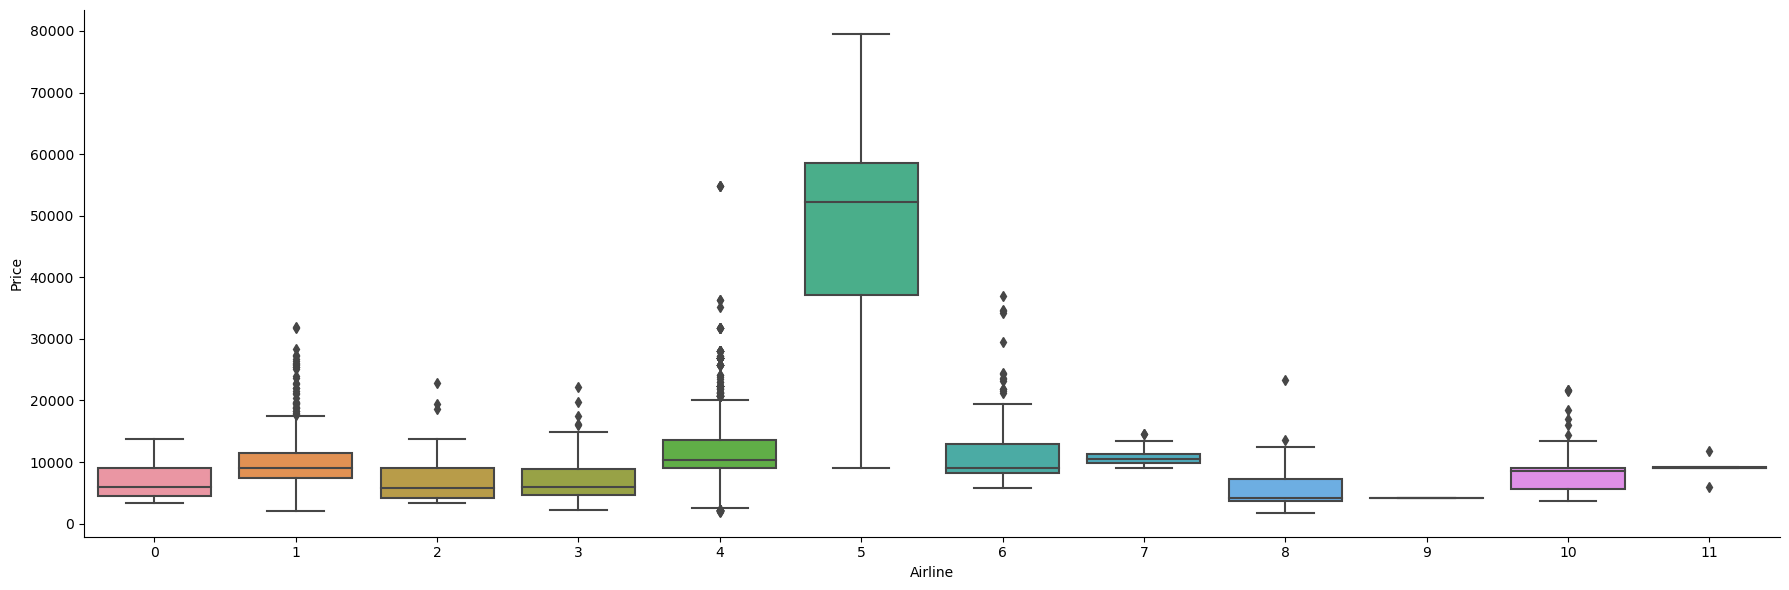

In [52]:
plt.figure(figsize = (12, 12))
sns.catplot(y = "Price", x = "Airline", data = finaldf.sort_values("Price", ascending = True), kind = "box", height = 6, aspect = 3)

# Chart 3  - Bar Plot (Price of Total Stops)

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x1200 with 0 Axes>

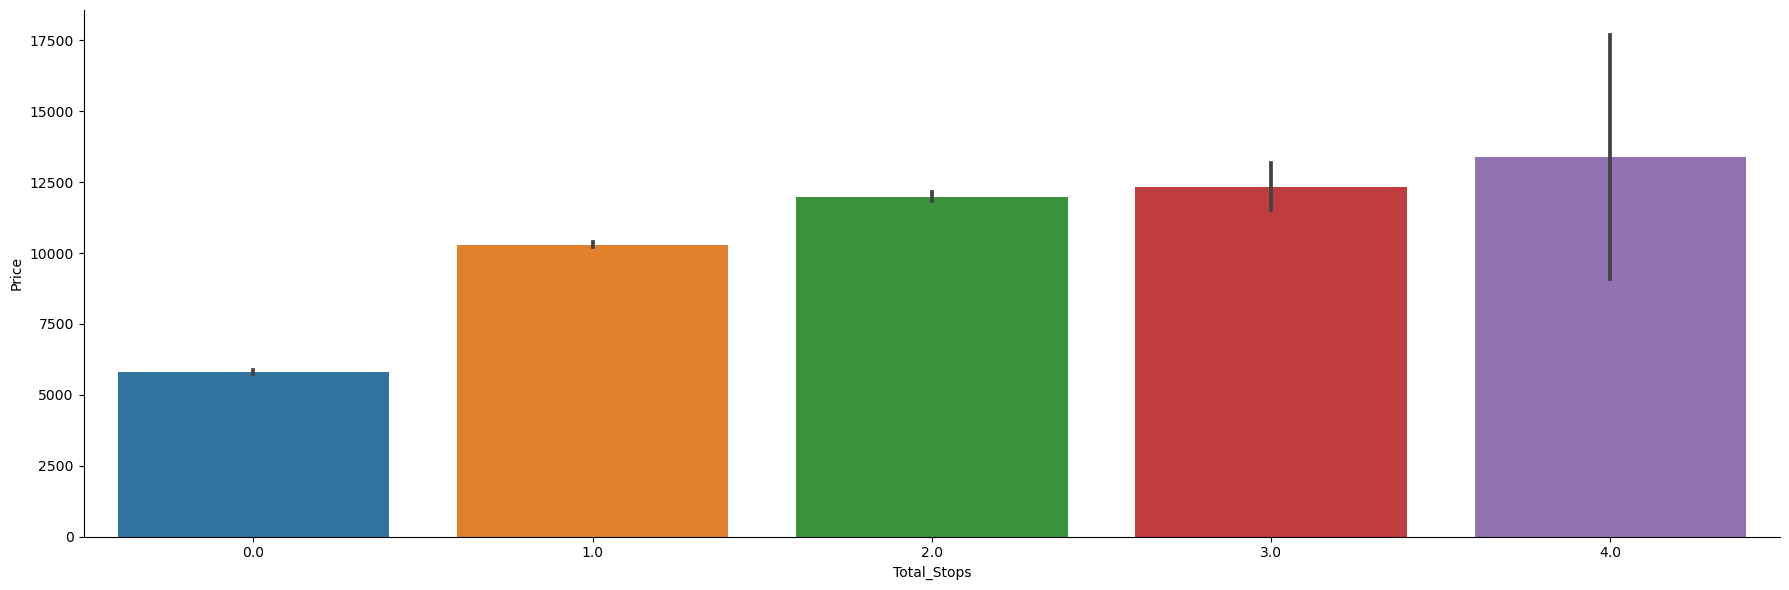

In [54]:
plt.figure(figsize = (12, 12))
sns.catplot(y = "Price", x = "Total_Stops", data = finaldf.sort_values("Price", ascending = False), kind = "bar", height = 6, aspect = 3)

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

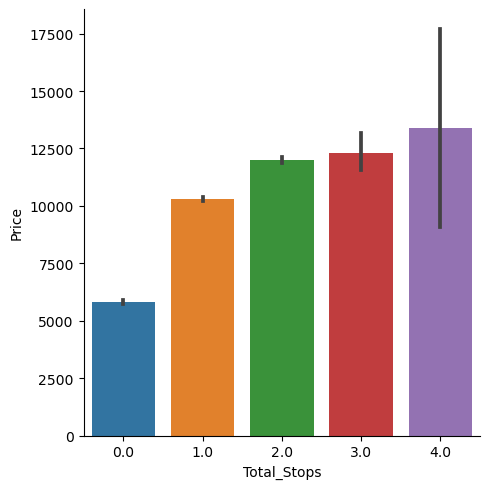

In [58]:
plt.figure(figsize = (12, 8))
sns.catplot(y = "Price", x = "Total_Stops", data = finaldf, kind = "bar")